<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#import libraries
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
import statistics

In [2]:
# load dataset from github account
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/winequalityN.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#feature variables
x=df.drop(['quality'], axis=1)
#target variable
y=df.quality



In [13]:
# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)
xs = pd.DataFrame(scaled_x, columns = x.columns)

Eigen vectors:  [[ 0.47058767  0.25874751  0.35884302 -0.11260144 -0.24536194  0.29575945
  -0.34537943 -0.41258885  0.14352849  0.17935133  0.28261109  0.01790447]
 [ 0.07511463  0.27107825  0.03326336  0.20767937  0.39878829  0.2402179
   0.17094455  0.19265571  0.56076495 -0.19384841  0.1206607  -0.47641228]
 [-0.04927707  0.4488607  -0.28749161  0.58650524 -0.17191236  0.00661142
  -0.15569072 -0.12562298 -0.1608734  -0.44938031  0.09086713  0.25250339]
 [ 0.01623497 -0.1663672  -0.2172377   0.26728985 -0.16241974  0.23529635
   0.36178801  0.21096779 -0.07334975  0.41840808  0.63516641  0.11134588]
 [-0.07676209 -0.15355922  0.15098581 -0.16157212 -0.35429005  0.64085085
   0.17682195  0.14057956 -0.2958799  -0.43954771 -0.10222657 -0.20781637]
 [ 0.10888387  0.21737851  0.48328371 -0.20136881  0.1890347  -0.16974075
   0.42030935  0.17859578 -0.0396984  -0.29297527  0.21574881  0.50962523]
 [ 0.16203051  0.28556409  0.2385939   0.33729238 -0.32696995 -0.02156
   0.36021943  0.142

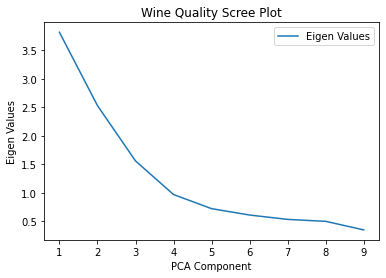

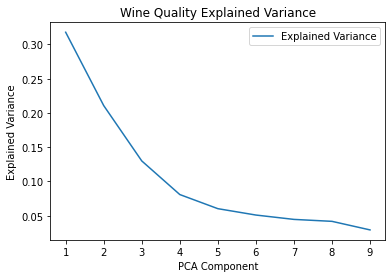

In [15]:
#Scree plot PCA components
comp = 9

pca = PCA(n_components=comp)
principalComponents = pca.fit_transform(xs)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9'])
finalDf = pd.concat([principalDf, df[['quality']]], axis = 1)
finalDf.head(10)

print('Eigen vectors: ', pca.components_)
print('Eigen values: ',pca.explained_variance_)
print('Explained variance per PC: ', pca.explained_variance_ratio_)

xPCA=[1, 2, 3, 4, 5, 6, 7, 8, 9]

pyplot.plot(xPCA,pca.explained_variance_, label='Eigen Values')
pyplot.title('Wine Quality Scree Plot')
pyplot.ylabel('Eigen Values')
pyplot.xlabel('PCA Component')
pyplot.legend()
pyplot.show()

pyplot.plot(xPCA,pca.explained_variance_ratio_, label='Explained Variance')
pyplot.title('Wine Quality Explained Variance')
pyplot.ylabel('Explained Variance')
pyplot.xlabel('PCA Component')
pyplot.legend()
pyplot.show()

In [20]:
#Generate PCA components = 3
comp = 3

pca = PCA(n_components=comp)
principalComponents = pca.fit_transform(xs)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, df[['quality']]], axis = 1)
print(finalDf.head(10))

print('Eigen vectors: ', pca.components_)
print('Eigen values: ',pca.explained_variance_)
print('Explained variance per PC: ', pca.explained_variance_ratio_)

if comp==2:
   pyplot.scatter(finalDf['principal component 1'], finalDf['principal component 1'], c=finalDf['quality'])
   pyplot.title('PCA Results - Diabetes Dataset')
   pyplot.ylabel('PC2')
   pyplot.xlabel('PC1')


   principal component 1  principal component 2  principal component 3  \
0              -2.176367               3.535401              -0.694878   
1              -0.248935              -0.552194              -0.314149   
2              -0.378902               0.365109               0.481012   
3              -1.733873               0.933956              -0.366839   
4              -1.733873               0.933956              -0.366839   
5              -0.378902               0.365109               0.481012   
6              -0.865874               0.023467              -1.159144   
7              -2.176367               3.535401              -0.694878   
8              -0.248935              -0.552194              -0.314149   
9              -0.573958              -0.554034               1.225518   

   quality  
0        6  
1        6  
2        6  
3        6  
4        6  
5        6  
6        6  
7        6  
8        6  
9        6  
Eigen vectors:  [[ 0.47058767  0.25874751 

cluster:  0
pred quality:  5.863192182410423 0.8560703495258893
cluster:  1
pred quality:  5.6918876755070205 0.824723184380683
cluster:  2
pred quality:  5.866666666666666 0.8685443227300218
cluster:  3
pred quality:  5.4718543046357615 0.7859900150632434
cluster:  4
pred quality:  5.6110659072416595 0.7582819083250563
cluster:  5
pred quality:  6.3448540706605225 0.8785427991078625
cluster:  6
pred quality:  5.641921397379913 0.78794919971689
MAE:  0.6713523655099479    stdev:  0.8248808197703049


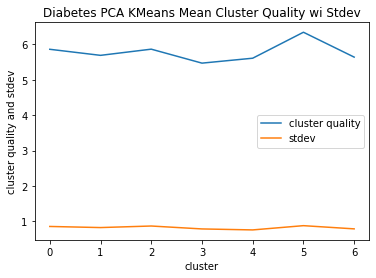

In [36]:
# KMeans

x3PCA = finalDf.drop(['quality'], axis=1)
y3PCA = finalDf['quality']
cstd = []
cquality = []
kmeans = KMeans(n_clusters=7, random_state=1, max_iter=5000) 
tic = time.perf_counter()
labels = kmeans.fit_predict(x3PCA)
toc = time.perf_counter()

dfc = finalDf.drop(['principal component 1', 'principal component 2', 'principal component 3' ], axis=1)
dfc['cluster']=labels
dfc['predquality']=labels

for i in range(0, 7):
  print('cluster: ', i)
  cluster = dfc.loc[dfc['cluster'] == i]
  #print(cluster)
  pred_quality = cluster['quality'].mean()
  cquality.append(pred_quality)
  qstd = cluster['quality'].std()
  cstd.append(qstd)
  print('pred quality: ',pred_quality, qstd)
  dfc['predquality'] = dfc['predquality'].replace(i,pred_quality)

MAE = mean_absolute_error(dfc['quality'], dfc['predquality'])
temp=dfc['quality'] - dfc['predquality']
#tstd = temp.std()
print('MAE: ',MAE, '   stdev: ', temp.std())

pyplot.plot([0, 1, 2, 3, 4, 5, 6], cquality , label='cluster quality')
pyplot.plot([0, 1, 2, 3, 4, 5, 6], cstd , label='stdev')
pyplot.title('Diabetes PCA KMeans Mean Cluster Quality wi Stdev')
pyplot.ylabel('cluster quality and stdev')
pyplot.xlabel('cluster')
pyplot.legend()
pyplot.show()


In [34]:
# EM
gmm = GaussianMixture(n_components=7, max_iter=5000, covariance_type='full', random_state=7)
tic = time.perf_counter()
gmm_y = gmm.fit_predict(x3PCA)
toc = time.perf_counter()

predquality = np.zeros_like(gmm_y)

for i in range(7):
    cat = (gmm_y == i)
    predquality[cat] = statistics.mean(y[cat])  
acc = accuracy_score(y3PCA, predquality)
print("Accuracy using GMM = ", acc)
print('MAE: ', mean_absolute_error(y3PCA, predquality))
print('time: ', (toc-tic))

Accuracy using GMM =  0.4059743073827581
MAE:  0.7375019346850332
time:  0.3750455189983768
